### Import Libraries

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv("Resources/Athlete_genie.csv")

### EDA

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.shape

(271116, 15)

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Data Cleaning & Engineering

In [7]:
# Focus on only 10 Olympic games to reduce csv file size
df_filtered = df.query('Year >= 1998')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88863 entries, 1 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      88863 non-null  int64  
 1   Name    88863 non-null  object 
 2   Sex     88863 non-null  object 
 3   Age     88858 non-null  float64
 4   Height  88068 non-null  float64
 5   Weight  87567 non-null  float64
 6   Team    88863 non-null  object 
 7   NOC     88863 non-null  object 
 8   Games   88863 non-null  object 
 9   Year    88863 non-null  int64  
 10  Season  88863 non-null  object 
 11  City    88863 non-null  object 
 12  Sport   88863 non-null  object 
 13  Event   88863 non-null  object 
 14  Medal   12578 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 10.8+ MB


In [8]:
# Null values in Age, Height, Weight, Medal

In [9]:
# Fill in null values for Age with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Age'].transform('median')

df_filtered['Age'] = df_filtered['Age'].fillna(medians)

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\818356921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age'] = df_filtered['Age'].fillna(medians)


In [10]:
# Fill in null values for Height with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Height'].transform('median')

df_filtered['Height'] = df_filtered['Height'].fillna(medians)

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\2977780780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Height'] = df_filtered['Height'].fillna(medians)


In [11]:
# Fill in null values for Weight with medians based on Sex and Sport

medians = df_filtered.groupby(['Sex','Sport'])['Weight'].transform('median')

df_filtered['Weight'] = df_filtered['Weight'].fillna(medians)

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\1062986342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Weight'] = df_filtered['Weight'].fillna(medians)


In [12]:
# Fill in null values for Medal

df_filtered["Medal"] = df_filtered["Medal"].fillna("No Medal")

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\3904986887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Medal"] = df_filtered["Medal"].fillna("No Medal")


In [13]:
# Drop unneccesary columns ID, Name, Team, Games, City, Event

df_filtered.drop(["ID","Name","Team","Games","City", "Event"],axis=1,inplace=True)

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\1907556600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(["ID","Name","Team","Games","City", "Event"],axis=1,inplace=True)


In [14]:
le = preprocessing.LabelEncoder()
df_filtered['Sport'] = le.fit_transform(df_filtered['Sport'])
df_filtered['Sex'] = le.fit_transform(df_filtered['Sex'])
df_filtered['Season'] = le.fit_transform(df_filtered['Season'])
df_filtered['NOC'] = le.fit_transform(df_filtered['NOC'])

C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\4079661225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sport'] = le.fit_transform(df_filtered['Sport'])
C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\4079661225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sex'] = le.fit_transform(df_filtered['Sex'])
C:\Users\eugch\AppData\Local\Temp\ipykernel_22300\4079661225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [15]:
df_filtered.head(20)

,Sex,Age,Height,Weight,NOC,Year,Season,Sport,Medal
1,1,23.0,170.0,60.0,39,2012,0,25,No Medal
28,1,26.0,186.0,96.0,64,2002,1,24,No Medal
31,1,31.0,172.0,70.0,64,2000,0,3,No Medal
33,0,34.0,159.0,55.5,64,2000,0,32,No Medal
40,1,28.0,184.0,85.0,64,2014,1,24,Bronze
57,1,31.0,189.0,130.0,64,2000,0,2,No Medal
68,1,26.0,176.0,85.0,141,1998,1,0,No Medal
69,1,26.0,176.0,85.0,141,1998,1,0,No Medal
70,1,26.0,176.0,85.0,141,1998,1,0,No Medal
71,1,26.0,176.0,85.0,141,1998,1,0,No Medal


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88863 entries, 1 to 271115
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     88863 non-null  int32  
 1   Age     88863 non-null  float64
 2   Height  88863 non-null  float64
 3   Weight  88863 non-null  float64
 4   NOC     88863 non-null  int32  
 5   Year    88863 non-null  int64  
 6   Season  88863 non-null  int32  
 7   Sport   88863 non-null  int32  
 8   Medal   88863 non-null  object 
dtypes: float64(3), int32(4), int64(1), object(1)
memory usage: 5.4+ MB


In [17]:
df_filtered.to_csv('Resources/athlete_cleaned.csv', index=False)

### Preprocessing

In [18]:
# Separate the X variable, the features
X = df_filtered.drop("Medal",axis = 1)

# Separate the y variable, the labels
y = df_filtered["Medal"]

In [19]:
# Review the X variable DataFrame
X.head()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport
1,1,23.0,170.0,60.0,39,2012,0,25
28,1,26.0,186.0,96.0,64,2002,1,24
31,1,31.0,172.0,70.0,64,2000,0,3
33,0,34.0,159.0,55.5,64,2000,0,32
40,1,28.0,184.0,85.0,64,2014,1,24


In [20]:
# Review the y variable Series
print(y)

1         No Medal
28        No Medal
31        No Medal
33        No Medal
40          Bronze
            ...   
271110    No Medal
271112    No Medal
271113    No Medal
271114    No Medal
271115    No Medal
Name: Medal, Length: 88863, dtype: object


In [21]:
X.describe()

,Sex,Age,Height,Weight,NOC,Year,Season,Sport
count,88863.000000,88863.000000,88863.000000,88863.000000,88863.000000,88863.000000,88863.000000,88863.000000
mean,0.578857,25.806905,175.783656,71.070950,100.336259,2007.612055,0.240696,21.518360
std,0.493745,5.416856,10.882460,15.172392,60.589962,5.701500,0.427509,15.296335
min,0.000000,12.000000,133.000000,28.000000,0.000000,1998.000000,0.000000,0.000000
25%,0.000000,22.000000,168.000000,60.000000,51.000000,2004.000000,0.000000,8.000000
50%,1.000000,25.000000,175.000000,70.000000,94.000000,2008.000000,0.000000,21.000000
75%,1.000000,29.000000,183.000000,80.000000,159.000000,2012.000000,0.000000,36.000000
max,1.000000,71.000000,226.000000,214.000000,209.000000,2016.000000,1.000000,50.000000


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88863 entries, 1 to 271115
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     88863 non-null  int32  
 1   Age     88863 non-null  float64
 2   Height  88863 non-null  float64
 3   Weight  88863 non-null  float64
 4   NOC     88863 non-null  int32  
 5   Year    88863 non-null  int64  
 6   Season  88863 non-null  int32  
 7   Sport   88863 non-null  int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 4.7 MB


In [23]:
# Treat unbalanced data

smo = SMOTE()
smo_x,smo_y  = smo.fit_resample(X,y)

In [24]:
smo_y.value_counts()

Medal
No Medal    76285
Bronze      76285
Gold        76285
Silver      76285
Name: count, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(smo_x,smo_y,test_size=0.25)

### The Model

Find best n_estimator for RandomForestClassifier

Work Cited: https://stackoverflow.com/questions/60768008/how-to-choose-n-estimators-in-randomforestclassifier

In [27]:
scores =[]
for k in range(50, 110):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(77, 0.9335870354591335, 'Best n_estimator: 97\nTesting Accuracy: 0.9354')

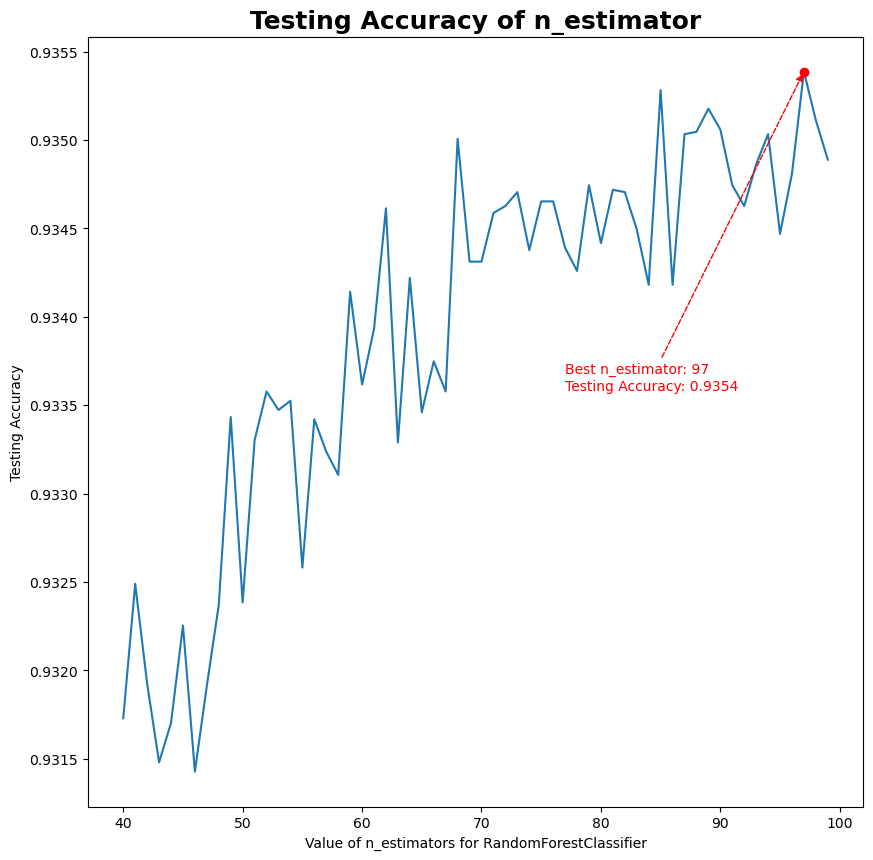

In [143]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
xplot = range(40, 100)
yplot = scores

max_index = np.argmax(yplot)

max_x = xplot[max_index]
max_y = yplot[max_index]


plt.plot(xplot, yplot)
plt.plot(max_x, max_y,"ro")
plt.xlabel('Value of n_estimators for RandomForestClassifier')
plt.ylabel('Testing Accuracy')
plt.title("Testing Accuracy of n_estimator", fontsize=18, fontweight="bold")
plt.annotate(f'Best n_estimator: {max_x}\nTesting Accuracy: {max_y:.4f}', xy=(max_x,max_y),xytext=(max_x - 20, max_y - 0.0018), color='red', arrowprops=dict(arrowstyle='-|>',color='red',ls='--'))

In [31]:
max_index = np.argmax(yplot)

max_x = xplot[max_index]
max_y = yplot[max_index]

print(max_x)
print(max_y)

97
0.9353870354591335


In [32]:
# 97 is the optimal number of decision trees

Train the model

Work Cited: https://www.kaggle.com/code/yazeedalsahouri03/olympics-prediction#The-Model

In [46]:
import seaborn as sns
model = RandomForestClassifier(n_estimators=97,n_jobs=-1)

In [47]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=97, n_jobs=-1)

In [48]:
model.score(X_test,y_test)

0.9356623189355705

In [49]:
y_pre= model.predict(X_test)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

      Bronze       0.94      0.93      0.94     19071
        Gold       0.94      0.94      0.94     19039
    No Medal       0.92      0.94      0.93     19277
      Silver       0.94      0.93      0.94     18898

    accuracy                           0.94     76285
   macro avg       0.94      0.94      0.94     76285
weighted avg       0.94      0.94      0.94     76285



In [50]:
confusion_matrix(y_test,y_pre)

array([[17813,   315,   603,   340],
       [  327, 17880,   439,   393],
       [  451,   364, 18029,   433],
       [  337,   403,   503, 17655]], dtype=int64)

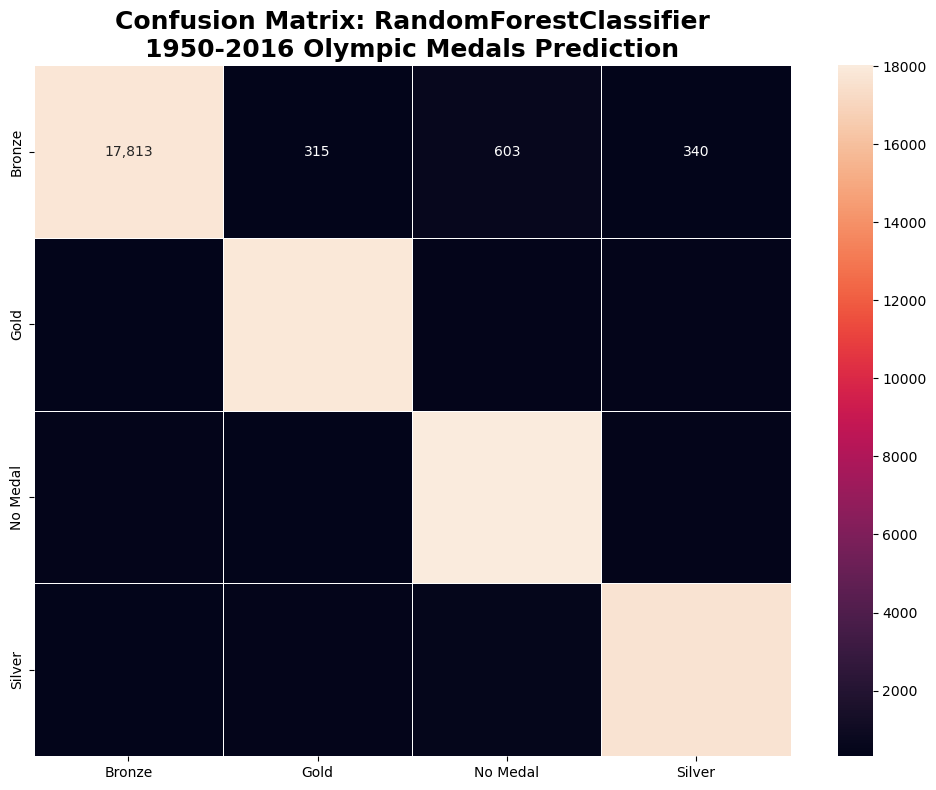

In [151]:
con = confusion_matrix(y_test,y_pre)
x_labels =["Bronze","Gold","No Medal","Silver"]
y_labels =["Bronze","Gold","No Medal","Silver"]

plt.figure(figsize=(10,8))
sns.heatmap(con, annot=True, fmt=',.0f',linewidths=.5, xticklabels=x_labels, yticklabels=y_labels)
plt.title('Confusion Matrix: RandomForestClassifier\n1950-2016 Olympic Medals Prediction', fontsize=18, fontweight="bold")
plt.tight_layout()

### Feature Importance

In [52]:
importance = dict(zip(model.feature_names_in_,model.feature_importances_))
sorted(importance.items(),key=lambda x:x[1],reverse=True)

[('NOC', 0.20287875959521987),
 ('Weight', 0.16869581809880782),
 ('Age', 0.1640934465046754),
 ('Height', 0.16336108810576863),
 ('Sport', 0.1520966916274763),
 ('Year', 0.12778229938667318),
 ('Sex', 0.01092752016597428),
 ('Season', 0.010164376515404598)]

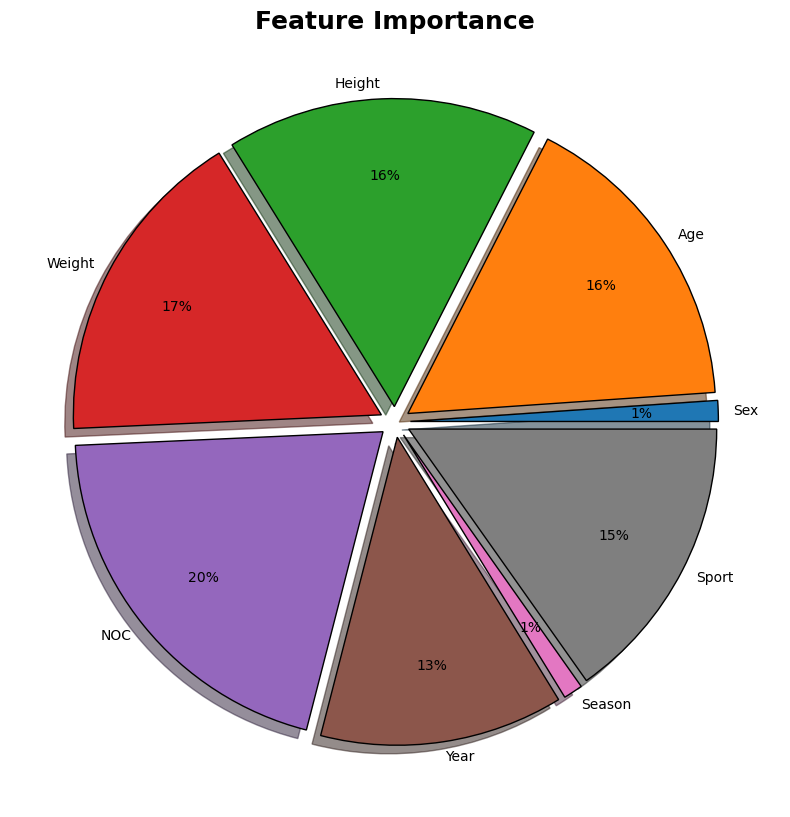

In [131]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(model.feature_importances_, labels=model.feature_names_in_, pctdistance=.75,labeldistance=1.05,autopct="%1.0f%%", explode=explode, shadow=True, wedgeprops={"edgecolor":"black", 'linewidth':1, 'antialiased':True})
plt.title("Feature Importance", fontsize=18, fontweight="bold")

plt.show()